## Root Finding

Two of the most common problems in economics:
\begin{align*}
f(x) =0&, \qquad f:\mathbb{R}^n\to \mathbb{R}^n \\
g(x) =x&, \qquad g:\mathbb{R}^n\to \mathbb{R}^n
\end{align*}

The first is a root-finding problem, and the second is a fixed-point problem. The two are equivalent:
- For any $g$, define $f=g-x$. Then, $g=x\Leftrightarrow f=0$ 

One wat to solve $f(x)=0$ is to convert it to a minimization problem:
$$ \argmin_{x} \frac{1}{2} \sum_{i} f_i (x)^2, $$
where the *min* will be equal to zero only at the root

However, there are good reasons not to do this:

- When trying to solve $f(x)=0$ we are often very demanding and want $f(x)$ very close to zero. When doing minimization, we are usually satisfied with just being fairly close to zero

- The minimization problem may have many local minima. These types of problems are very hard to solve

Algorithms for solving root-finding problems:

1. Bisection method

2. Newton's method

3. Secant method

4. Brent's method

### 1. Bisection method

The bisection method approximates the roots of continuous functions by *repeatedly dividing* the interval at midpoints. The technique works when two function values with opposite signs are known.

**Note.** If there is a root of $f(x)$ on the interval $[x_0,x_1]$ then $f(x_0)$ and $f(x_1)$ must have a different sign.

Let $x_0$ and $x_1$ be the start and endpoints for the estimated interval. The midpoint can be calculated as:
$$ x_2 = x_0 + \frac{x_1-x_0}{2} $$

The next guess is either the midpoint of $x_0$ and $x_2$ or $x_2$ and $x_1$, depending on which side the root falls on.

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size' : 20, 'lines.linewidth' : 3.5, 'figure.figsize' : (13,7)})

Let's consider the case of the following function $f(x)$:
$$ f(x) = x^2 -1$$

In [2]:
def f(x):
    return (x**2 - 1)

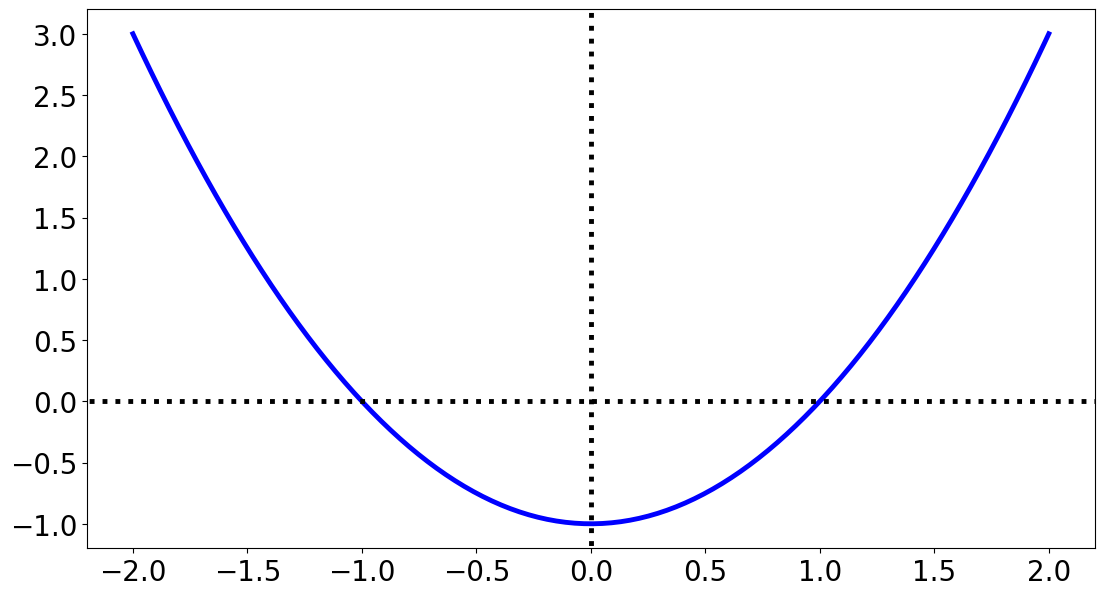

In [3]:
xpoints = np.linspace(-2, 2, 200)

fig, ax = plt.subplots()
ax.plot(xpoints, f(xpoints), 'b-')
ax.axvline(x=0, ymin=f(xpoints).min(), ymax=f(xpoints).max(), c='black', ls=':')
ax.axhline(y=0, xmin=xpoints.min(), xmax=xpoints.max(), c='black', ls=':');

We can clearly see there are two roots for this function. Let's start with our the bracket interval $[0,1.5]$

In [4]:
xbisec = optimize.bisect(f, 0, 1.5)
xbisec

1.0000000000004547

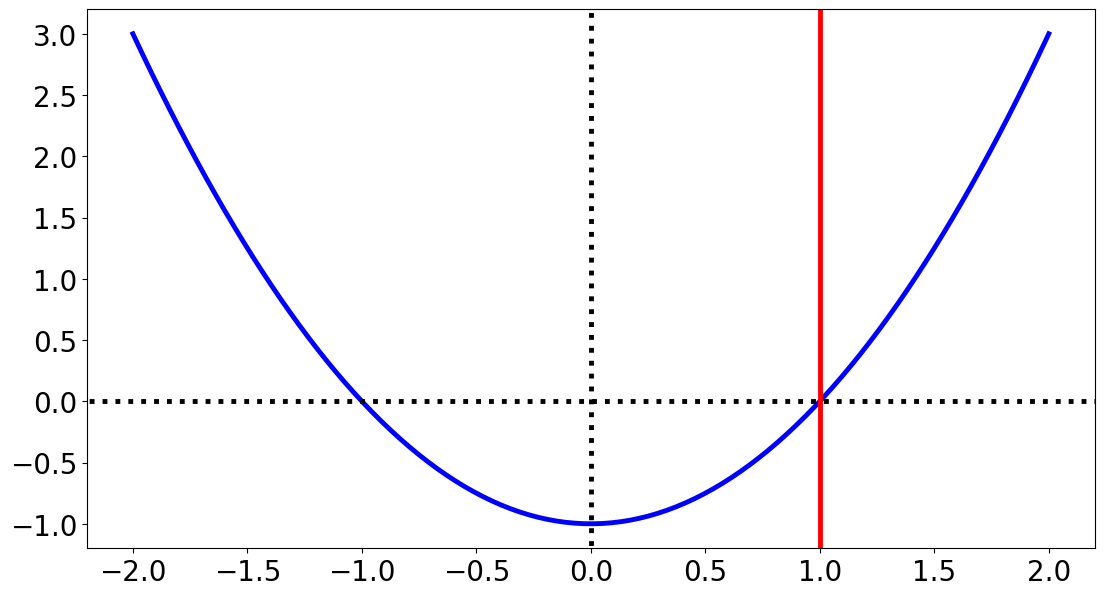

In [5]:
fig, ax = plt.subplots()
ax.plot(xpoints, f(xpoints), 'b-')
ax.axvline(x=0, ymin=f(xpoints).min(), ymax=f(xpoints).max(), c='black', ls=':')
ax.axvline(x=xbisec, ymin=f(xpoints).min(), ymax=f(xpoints).max(), c='red', ls='-')
ax.axhline(y=0, xmin=xpoints.min(), xmax=xpoints.max(), c='black', ls=':');

Now consider the bracket interval $[-1.5,0]$

In [6]:
xbisec = optimize.bisect(f, -1.5, 0)
xbisec

-1.0000000000004547

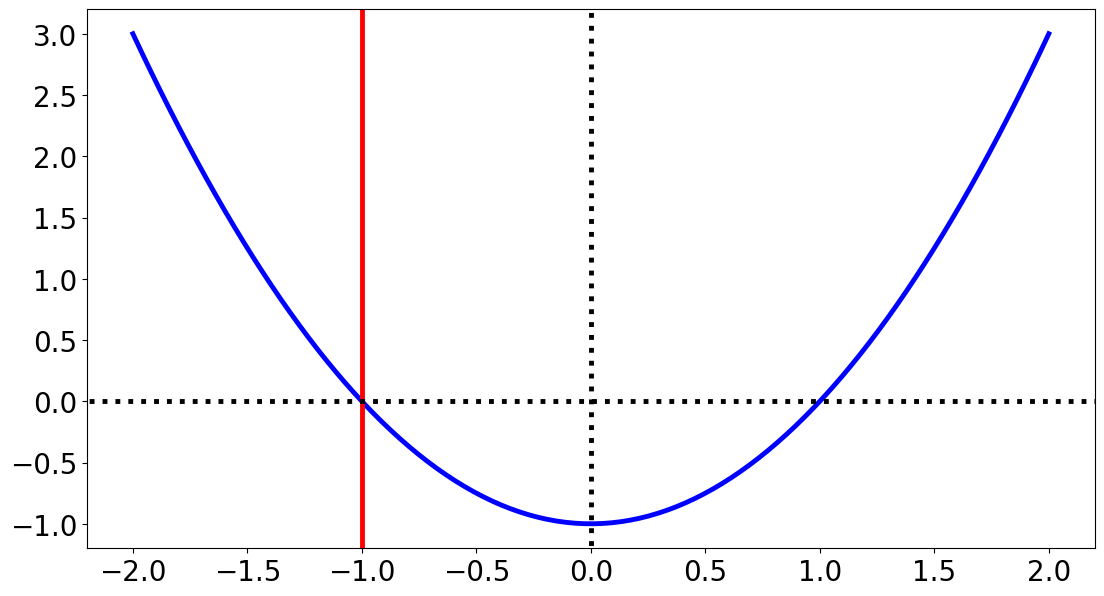

In [7]:
fig, ax = plt.subplots()
ax.plot(xpoints, f(xpoints), 'b-')
ax.axvline(x=0, ymin=f(xpoints).min(), ymax=f(xpoints).max(), c='black', ls=':')
ax.axvline(x=xbisec, ymin=f(xpoints).min(), ymax=f(xpoints).max(), c='red', ls='-')
ax.axhline(y=0, xmin=xpoints.min(), xmax=xpoints.max(), c='black', ls=':');

**Advantages**
- Finds a zero of any $C^0$ function.
- Doesn't require continuity, it always converge.
- Extremely simple and lightweight.
- Frequently used.

**Disadvantages**
- Convergence is slow relative to other methods.
- Have to  nd initial bracket (true of all these methods).

### 2. Newton's method

Newton’s method approximates the zeros of real-valued continuous functions.

Given a guess on the root, Newton's method computes the zero of a Taylor expansion about $f$:
$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}  $$

So, the method iteratively improves the approximation using knowledge about the function and its derivative at $x_n$.

Clearly, this method requires the first derivative of $f(x)$:

In [8]:
def df(x):
    return (2*x)

In [9]:
xnewton = optimize.newton(f, 0.1, df)
xnewton

1.0

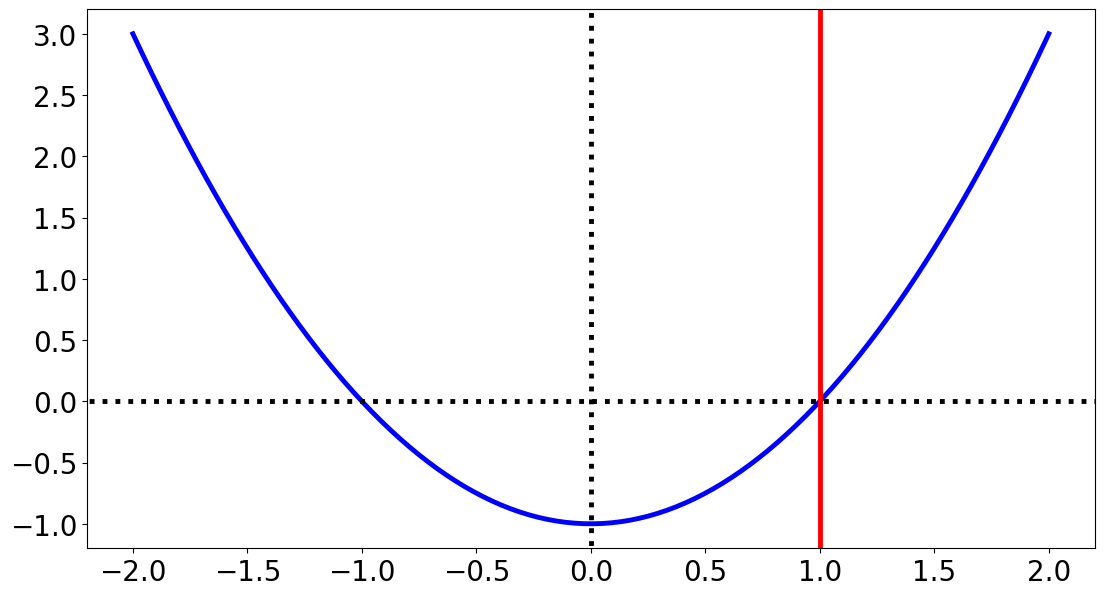

In [10]:
fig, ax = plt.subplots()
ax.plot(xpoints, f(xpoints), 'b-')
ax.axvline(x=0, ymin=f(xpoints).min(), ymax=f(xpoints).max(), c='black', ls=':')
ax.axvline(x=xnewton, ymin=f(xpoints).min(), ymax=f(xpoints).max(), c='red', ls='-')
ax.axhline(y=0, xmin=xpoints.min(), xmax=xpoints.max(), c='black', ls=':');

In [11]:
xnewton = optimize.newton(f, -0.1, df)
xnewton

-1.0

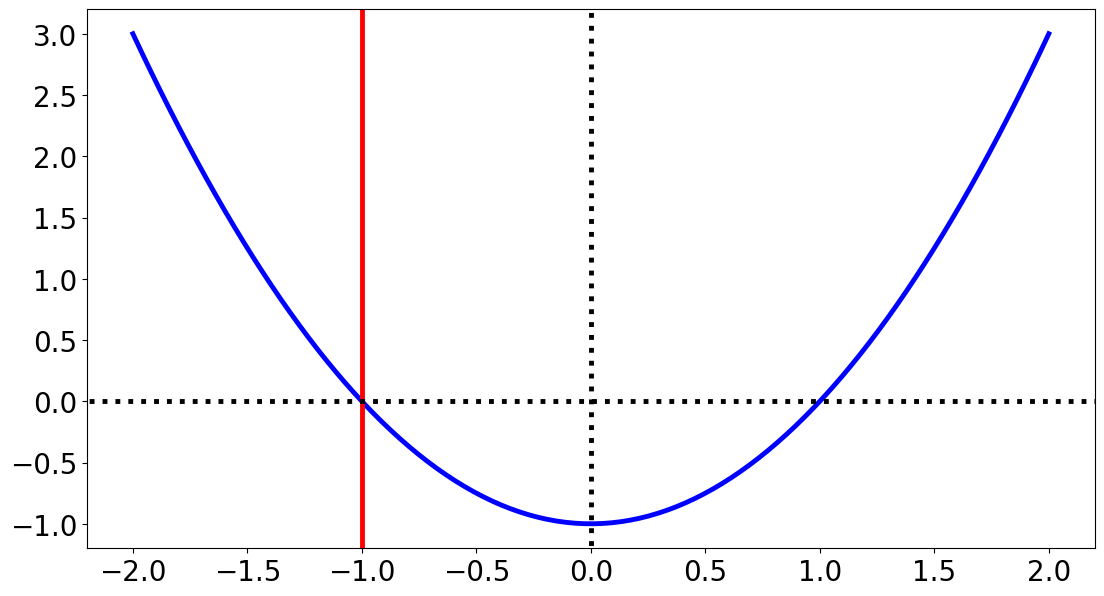

In [12]:
fig, ax = plt.subplots()
ax.plot(xpoints, f(xpoints), 'b-')
ax.axvline(x=0, ymin=f(xpoints).min(), ymax=f(xpoints).max(), c='black', ls=':')
ax.axvline(x=xnewton, ymin=f(xpoints).min(), ymax=f(xpoints).max(), c='red', ls='-')
ax.axhline(y=0, xmin=xpoints.min(), xmax=xpoints.max(), c='black', ls=':');

**Advantages**
- For a good enough initial guess, very quick.
- Can be generalized to the multidimensional case.
- Classic method, everyone knows of it.

**Disadvantages**
- Not guaranteed to converge.
- Most of the time it is costly to compute the first derivative of Jacobian.
- A better approach for the one dimensional case.

### 3. Secant method

Very similar to the previous methods, but it divides intervals by the secant line connecting the endpoints of the bracket interval.

Given a guess on the bracket interval, the new endpoint can be calculated as:
$$ x_n = x_{n-1} - f(x_{n-1}) \frac{x_{n-1}-x_{n-2}}{f(x_{n-1})-f(x_{n-2})} $$

Doesn't require the derivative of $f$:

In [13]:
xsecant = optimize.newton(f, 0.1)
xsecant

1.0

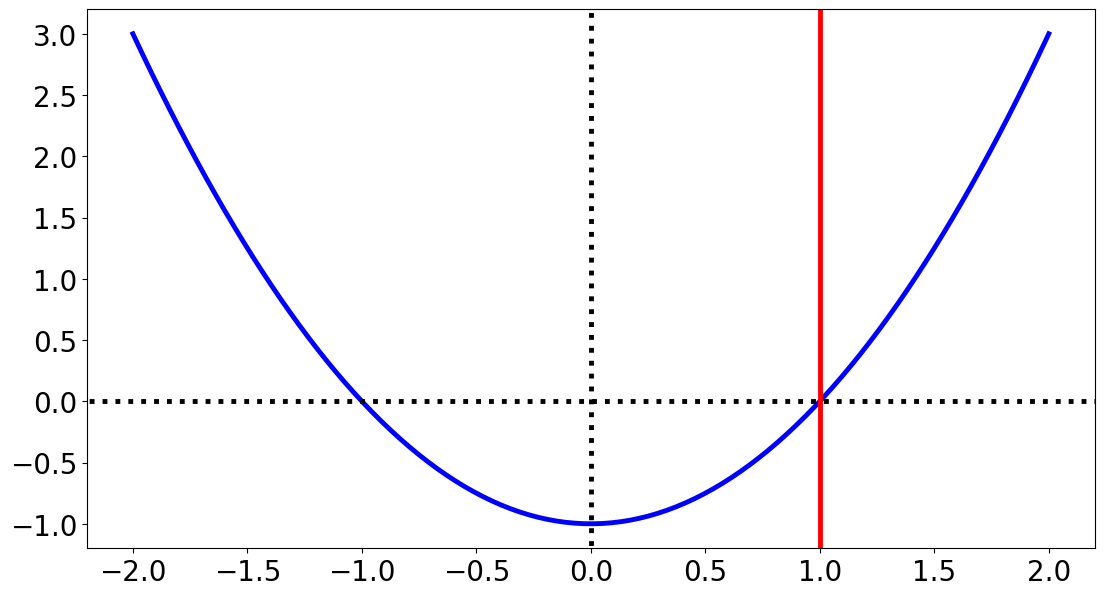

In [14]:
fig, ax = plt.subplots()
ax.plot(xpoints, f(xpoints), 'b-')
ax.axvline(x=0, ymin=f(xpoints).min(), ymax=f(xpoints).max(), c='black', ls=':')
ax.axvline(x=xsecant, ymin=f(xpoints).min(), ymax=f(xpoints).max(), c='red', ls='-')
ax.axhline(y=0, xmin=xpoints.min(), xmax=xpoints.max(), c='black', ls=':');

In [15]:
xsecant = optimize.newton(f, -0.1)
xsecant

-1.0

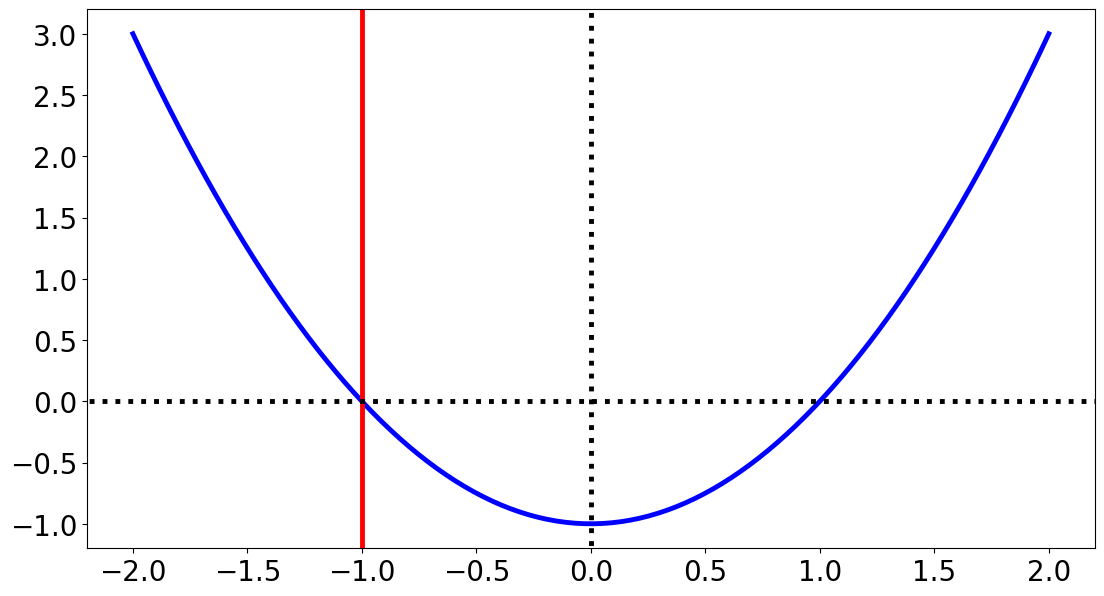

In [16]:
fig, ax = plt.subplots()
ax.plot(xpoints, f(xpoints), 'b-')
ax.axvline(x=0, ymin=f(xpoints).min(), ymax=f(xpoints).max(), c='black', ls=':')
ax.axvline(x=xsecant, ymin=f(xpoints).min(), ymax=f(xpoints).max(), c='red', ls='-')
ax.axhline(y=0, xmin=xpoints.min(), xmax=xpoints.max(), c='black', ls=':');

### 4. Brent's method

Always converges and is faster than other methods in the one dimensional case. This method uses:

- inverse quadratic interpolation 

- bisection when it can not 

Suppose $(a,f(a)),(b,f(b)),(c,f(c))$ represent three point pairs of the $f$ function

Approximate the $f$ function passing through these points by an inverse quadratic function:
$$ x=g(y)=\theta_0 + \theta_1 y + \theta_2 y^2 $$

The goal is to solve for $\{\theta_0,\theta_1,\theta_2\}$ which passes through $(a,f(a)),(b,f(b)),(c,f(c))$:
\begin{align*}
g(f(a)) &= a \\
g(f(b)) &= b \\
g(f(c)) &= c 
\end{align*}
that consists on 3 equations and 3 unknowns.

*Why do we approximate the inverse of the function instead of the function itself?*

We are interested in finding $f(x)=0$. Given the inverse quadratic interpolation, the root of the original function $f(x)=0$ becomes $x=g(0)$ since $g$ is the quadratic approximation of the function $f$. 

If the new point $g(0)$ doesn't belong to the possible valiues of $f$, take the $x=g(0)$ and compute a new quadratic interpolation 

Let's see this process chooseing 3 points from our previous example:

In [17]:
xp = np.array([-2, -0.5, 0])
fp = np.array([3, -.75, -1])

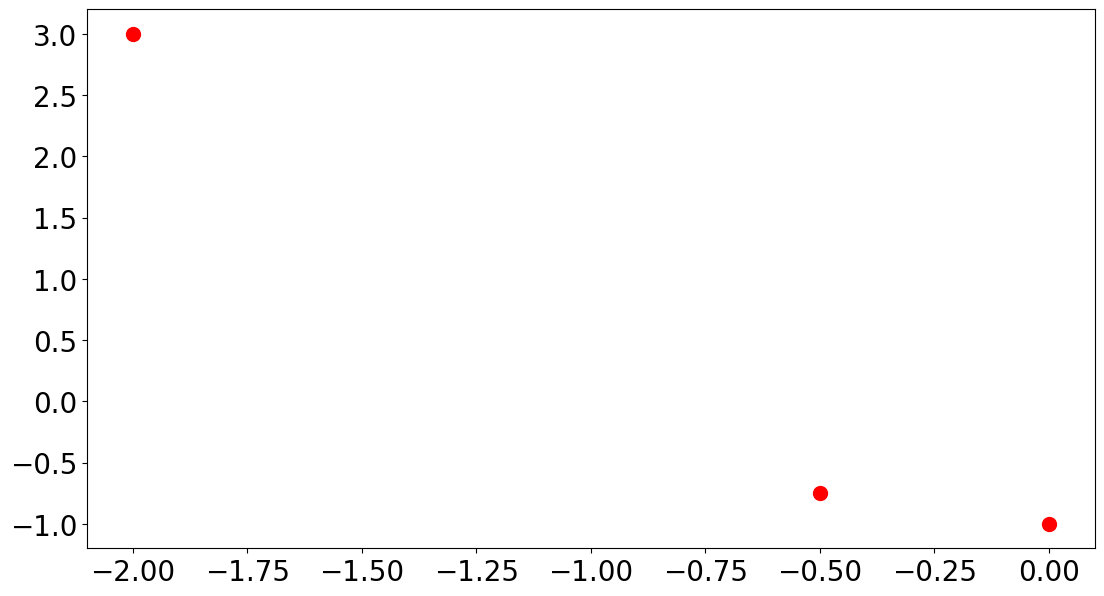

In [18]:
fig, ax = plt.subplots()
ax.plot(xp, fp, 'ro', markersize=10);

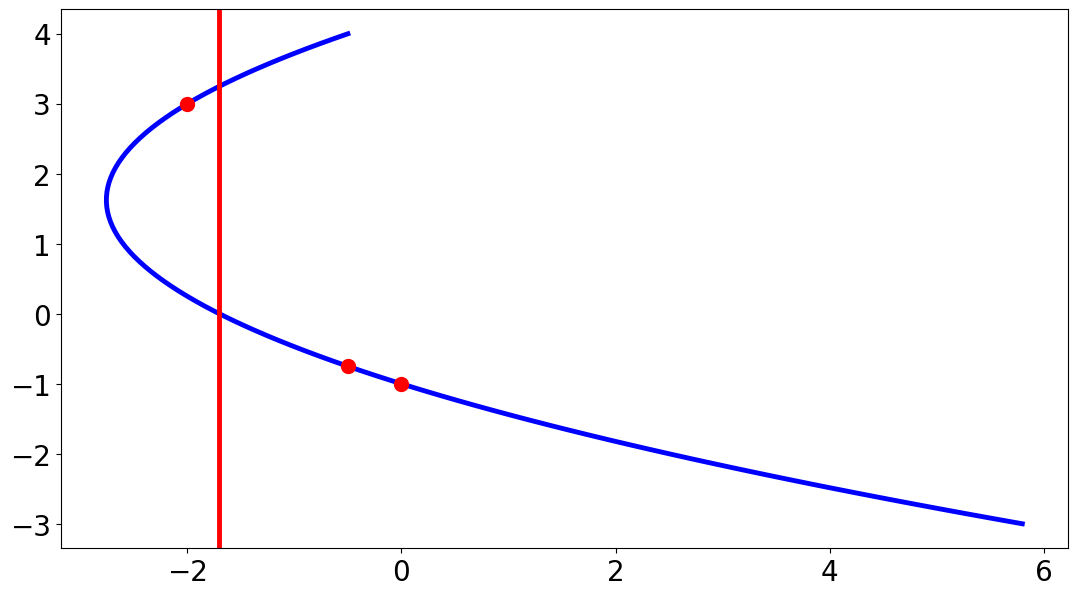

In [19]:
import functions

xpointn = np.linspace(-3, 4, 100)
fig, ax = plt.subplots()
ax.plot(functions.gy(xpointn,xp,fp), xpointn, 'b-', label='Nearest')
ax.axvline(x=functions.gy(0,xp,fp), ymin=f(xpointn).min(), ymax=f(xpointn).max(), c='red', ls='-')
ax.plot(xp, fp, 'ro', markersize=10);

Additional details:

- If the parabola doesn't exist (e.g., $f(a)=f(b)$), the secant method is used to generate a trial point

- With the trial points (using the IQI or the secant method), the algorithm checks that these points (i) fall within the bracket and (ii) the bracket shrinks enough

- If the trial point doesn't meet bith these criteria, a bisection step is taken

In [20]:
xbrent = optimize.brentq(f, -1.5, 0)
xbrent

-1.0000000000004687

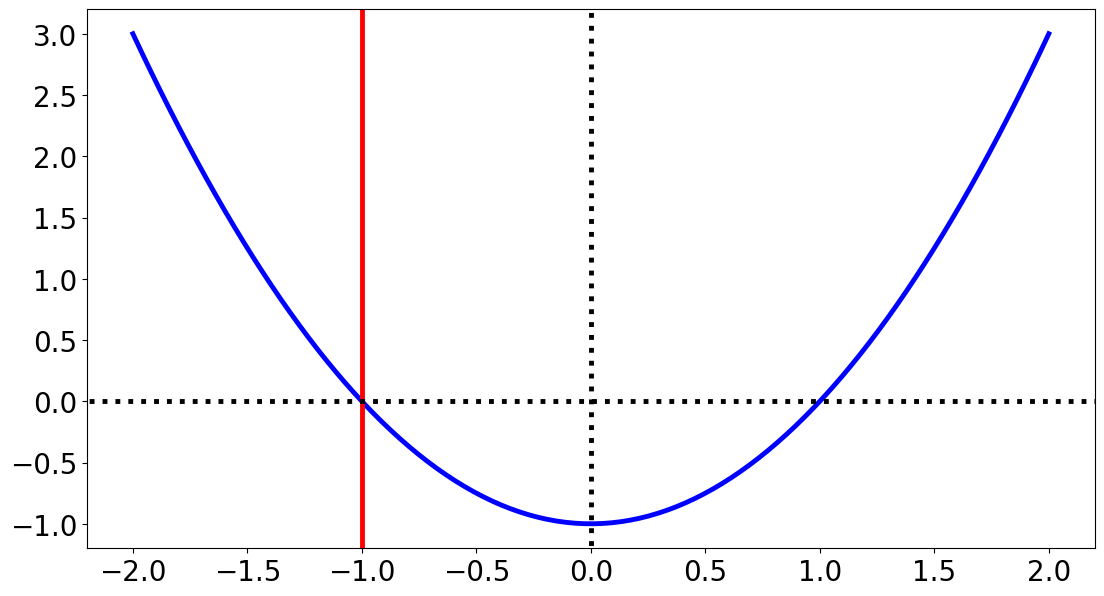

In [21]:
fig, ax = plt.subplots()
ax.plot(xpoints, f(xpoints), 'b-')
ax.axvline(x=0, ymin=f(xpoints).min(), ymax=f(xpoints).max(), c='black', ls=':')
ax.axvline(x=xbrent, ymin=f(xpoints).min(), ymax=f(xpoints).max(), c='red', ls='-')
ax.axhline(y=0, xmin=xpoints.min(), xmax=xpoints.max(), c='black', ls=':');

**Advantages**
- Finds a zero of any $C^0$ function. Doesn't require continuity.
- It always converges.
- Converges very quickly for any differentiable functions.

**Disadvantages**
- Difficult to program.
- There are several operations involve.

## Standard Value Function Iteration

Let's go back to *stochastic neoclassical growth model* with $t$ subscripts added:

\begin{gather*}
    \mathbb{V}_t(z,k) = \max_{c,k'} \left\{ u(c) + \beta \mathbb{E} [\mathbb{V}_{t+1}(z',k')|z] \right\} \\
    \text{s.t.} \quad c + k' = z k^{\alpha} + (1-\delta)k, \\
    c>0, k>0
\end{gather*}

Optimal policy characterized by two conditions:

**Envelope condition**:
$$
V_{k,t}(z,k) = (z\alpha k^{\alpha-1}+1-\delta) u'(c_t(z,k)) \tag{1}
$$

**First-order condition**:

$$
u'(c_t(z,k)) = \beta \mathbb{E}[V_{k,t+1}(z',k_t'(z,k))|z] \tag{2}
$$

The EGM defines a fixed grid over the values of $k_{t+1}$. The standard VFI defines the grid over the values of $k_t$.

**Step 1. Discounting and expectations** 

Define "end-of-period" value function $W_t$ as
$$
W_t(z,k') \equiv \beta \mathbb{E}[V_{t+1}(z',k')|z],
$$

so that (2) simplifies to 
$$
u'(c_t(z,k)) = W_{k,t}(z,k') \tag{3}
$$

**Step 2. Solve for capital policy using the FOC**

Notice that in the previous step, the RHS of the Euler equation is a function of $k'$ that is unkown.

However, we can *approximate* $W_{k,t}(z,k')$ on the entire domain of $K$ using *function approximation*. Denote the resulting approximate function as $\tilde{W}_{k,t}(z,k')$.

Combine this with the budget constraint, so (3) can be written as:
$$
u'(z k^{\alpha} + (1-\delta)k - k') = \tilde{W}_{k,t}(z,k') 
$$

or
$$ u'(z k^{\alpha} + (1-\delta)k - k') - \tilde{W}_{k,t}(z,k') = 0 \tag{4}  $$

Equation (4) is a root-finding problem that is a function of $k'$. Solving this problem for every $k$ gives us our the policy function $k_t'(z,k)$.

However, we need to make sure about the corner solutions:

- If (4) is greater than zero for $\underline{k}$, set $k'(z,k) = \underline{k}$

- If (4) is lower than zero for $\overline{k}$, set $k'(z,k) = \overline{k}$

- Otherwise call the nonlinear equation solver

**Step 3. Calculate consumption and new value function**

Given the calculated capital policy function $k_t'(s,k)$, we can compute the consumption policy function as:
$$
c_t(z,k) = coh_t(z,k) - k_t'(s,k).
$$

We can also compute the new value function using (3):
$$
V_{k,t}(z,k) = (z\alpha k^{\alpha-1} + 1-\delta) u'(c_t(z,k)) 
$$

**Step 4. Obtain the steady-state policy functions**

Iterate backward the value function until convergence criterion hit

In [2]:
# Baseline parameters
sigma   = 1
delta   = 1
beta    = 0.97
alpha   = 0.33

# Technology process
rho_z   = 0.95
sigma_z = 0.03
n_z     = 7

# Capital grid
kmin    = 0.01
kmax    = 5
n_k     = 50

In [3]:
# Import functions from the previous lecture
import make_grids

k_grid = make_grids.discretize_capital_exponential(kmin, kmax, n_k)
z_grid, piz, Piz = make_grids.markov_rouwenhorst(rho_z, sigma_z, n_z)

In [4]:
def value_function(Vk, Piz, k_grid, z_grid, beta, sigma, delta, alpha):
    # Step 1
    Wk = (beta * Piz) @ Vk
    
    # Step 2
    coh = z_grid[:, np.newaxis] * k_grid[np.newaxis, :] ** alpha + (1-delta)*k_grid[np.newaxis, :]
    gk = np.empty_like(Wk)
    for z in range(len(z_grid)):
        for k in range(len(k_grid)):
            if k==0:
                ax = k_grid[0]
            else:
                ax = gk[z,k-1]      # monotonicity
            bx = np.minimum(coh[z,k],k_grid.max())

            def euler(x):
                if coh[z,k] - x <= 0:
                    x1 = coh[z,k]-1e-2
                else: 
                    x1 = x
                return (coh[z,k]-x1)**(-1/sigma) - np.interp(x1, k_grid, Wk[z,:])

            if euler(ax) > 0:
                gk[z,k] = ax
            elif euler(bx) < 0:
                gk[z,k] = bx
            else: 
                gk[z,k] = optimize.brentq(euler, ax, bx)
        
    # Step 3
    gc = coh - gk
    Vk = (z_grid[:, np.newaxis] * alpha * (k_grid[np.newaxis, :] ** (alpha-1)) + 1-delta) *gc**(-1/sigma)
    
    return Vk, gk, gc

In [5]:
def policy_ss(Piz, k_grid, z_grid, beta, sigma, delta, alpha, tol=1E-9):
    # Initial guess for Vk
    coh = z_grid[:, np.newaxis] * k_grid[np.newaxis, :] ** alpha + (1-delta)*k_grid[np.newaxis, :]
    Vk = (coh) ** (-1/sigma) / (1-beta)
    
    # Iterate until maximum distance between two iterations falls below tol (fail-safe max of 10,000 iterations)
    for it in range(10_000):
        Vk, gk, gc = value_function(Vk, Piz, k_grid, z_grid, beta, sigma, delta, alpha)
        
        # After iteration 0, can compare new policy function to old one
        if it > 0 and np.max(np.abs(Vk - V_old)) < tol:
            return Vk, gk, gc
        
        V_old = Vk

In [6]:
Vy, gk, gc = policy_ss(Piz, k_grid, z_grid, beta, sigma, delta, alpha)

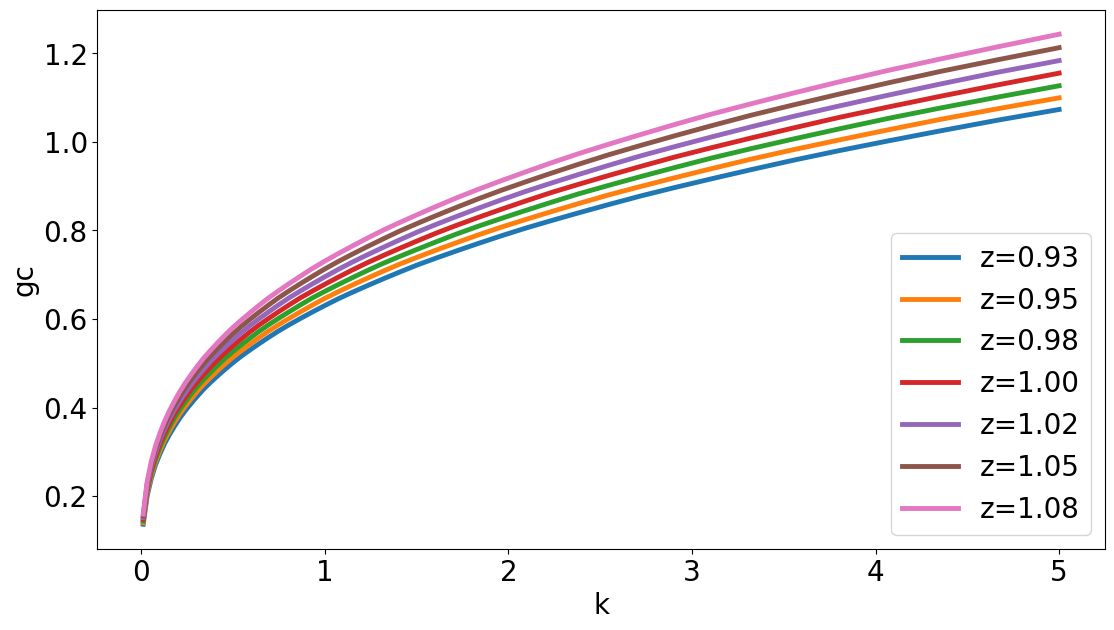

In [7]:
for s, zs in enumerate(z_grid):
    plt.plot(k_grid, gc[s, :], label=f'z={zs:.2f}')
plt.legend()
plt.xlabel('k')
plt.ylabel('gc');

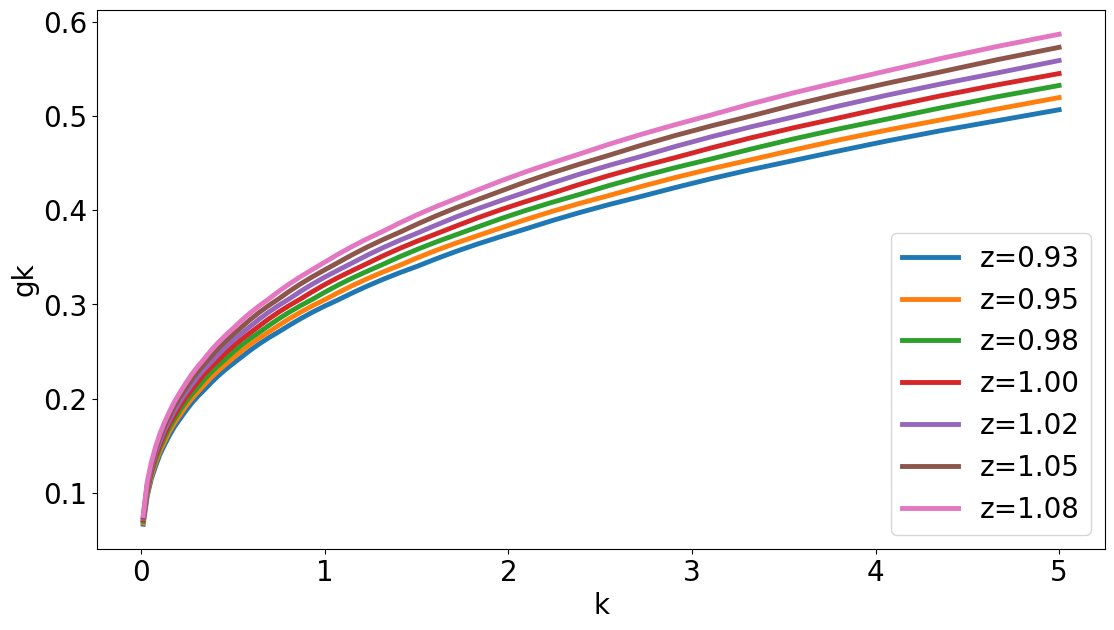

In [8]:
for s, zs in enumerate(z_grid):
    plt.plot(k_grid, gk[s, :], label=f'z={zs:.2f}')
plt.legend()
plt.xlabel('k')
plt.ylabel('gk');

In [9]:
gk_true = alpha * beta * z_grid[:, np.newaxis] * (k_grid[np.newaxis, :] ** alpha)
gc_true = (1 - alpha * beta) * z_grid[:, np.newaxis] * (k_grid[np.newaxis, :] ** alpha)

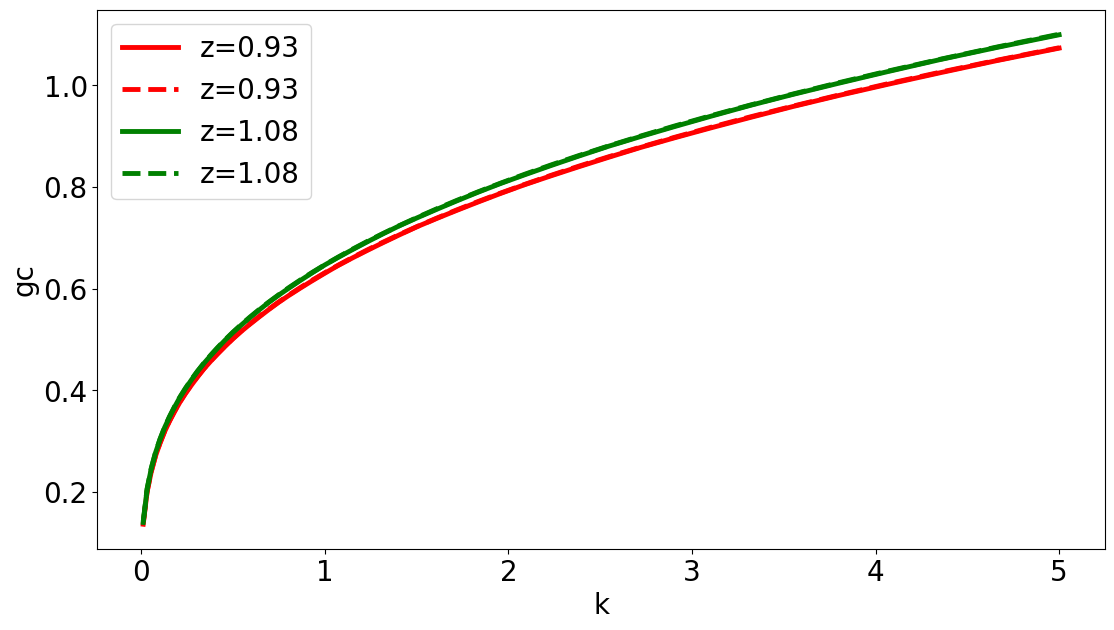

In [10]:
colors = ['r','g']
for s, zs in enumerate(z_grid[0:7:6]):
    plt.plot(k_grid, gc[s, :], label=f'z={zs:.2f}', color = colors[s])
    plt.plot(k_grid, gc_true[s, :], label=f'z={zs:.2f}', linestyle='dashed', color = colors[s])
plt.legend()
plt.xlabel('k')
plt.ylabel('gc');

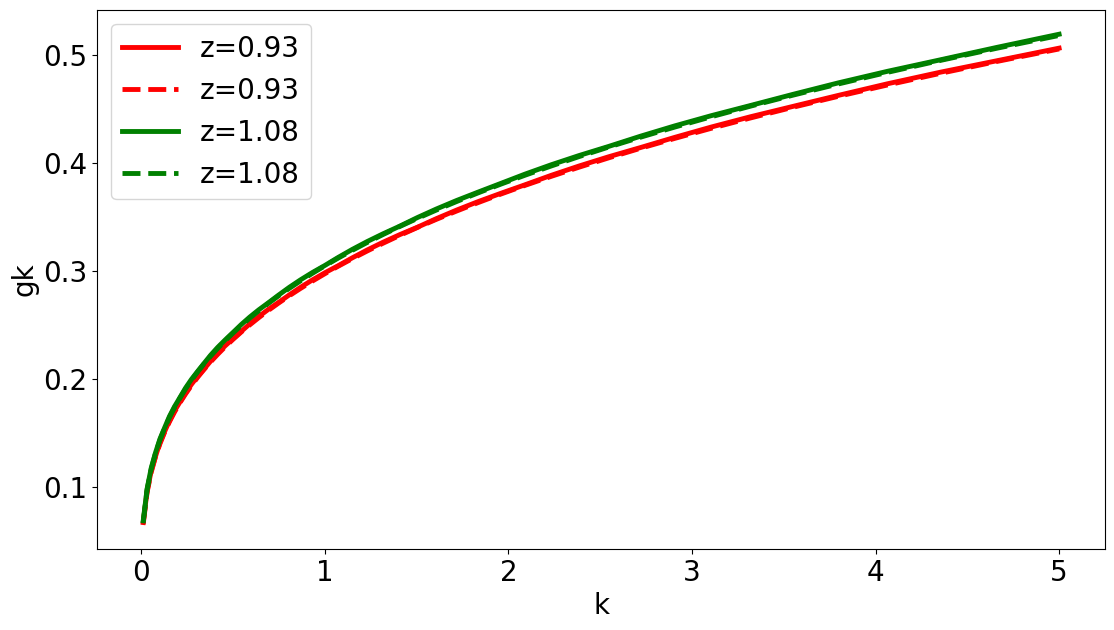

In [11]:
for s, zs in enumerate(z_grid[0:7:6]):
    plt.plot(k_grid, gk[s, :], label=f'z={zs:.2f}', color = colors[s])
    plt.plot(k_grid, gk_true[s, :], label=f'z={zs:.2f}', linestyle='dashed', color = colors[s])
plt.legend()
plt.xlabel('k')
plt.ylabel('gk');

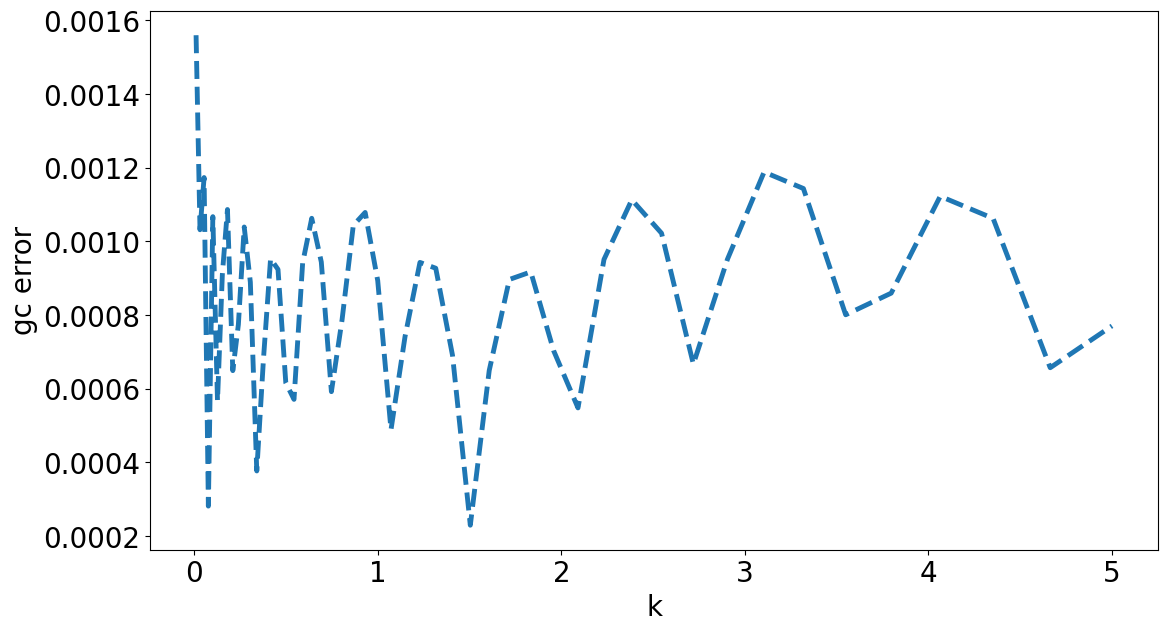

In [12]:
# Consumption policy function error
gc_error = np.abs(gc_true-gc)

for s, zs in enumerate(z_grid[0:1]):
    plt.plot(k_grid, gc_error[s, :], label=f'z={zs:.2f}', linestyle='dashed')
plt.xlabel('k')
plt.ylabel('gc error');

**Advantages**
- Very often applicable.
- Can handle occasionally binding constraints.

**Disadvantages**
- Have to do interpolation (extra coding step).
- Have to think about appropriate brackets for root finding.